In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
url = "http://books.toscrape.com/"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [4]:
books_html = soup.find_all("article", class_="product_pod")

print(len(books_html))

20


In [5]:
print(books_html)

[<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>, <article class="product_pod">
<div class="image_container">
<a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26

In [7]:
# İlk kitap
first_book = books_html[0]

# 1. Kitabın Başlığı
book_title = first_book.find("h3").find("a").attrs["title"]
print("Başlık:", book_title)

# 2. Fiyat
price_text = first_book.find("p", class_="price_color").text

book_price = float(price_text[1:]) 
print("Fiyat:", book_price)

# 3. Puanı
star_tag = first_book.find("p", class_="star-rating")
print("Puanı:", star_tag.attrs['class']) 


Başlık: A Light in the Attic
Fiyat: 51.77
Puanı: ['star-rating', 'Three']


In [9]:
#Puan isimlerini sayıya çevirme(yılıdz değerlendirmeleri)
def parse_rating(rating_classes):

    # Eşleştirme tablosu 
    mapper = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    

    for value in mapper.keys():
        if value in rating_classes:
            return mapper[value]
    return 0 

print(parse_rating(['star-rating', 'Three']))

3


In [11]:
all_books_data = [] 

# 50 sayfa var
for page_num in range(1, 51): 
    print(f"{page_num}. Sayfa taranıyor...")
    
    url = f"http://books.toscrape.com/catalogue/page-{page_num}.html"
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    books_on_page = soup.find_all("article", class_="product_pod")
    
    # Her kitabın içindeki bilgiler
    for book in books_on_page:
        # Başlık
        title = book.find("h3").find("a").attrs["title"]
        
        # Fiyat
        price = float(book.find("p", class_="price_color").text[1:])
        
        # Puan
        rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
        
        # Ekleme
        all_books_data.append({
            "Title": title,
            "Price": price,
            "Rating": rating
        })

print("Bitti! Toplam Kitap Sayısı:", len(all_books_data))

1. Sayfa taranıyor...
2. Sayfa taranıyor...
3. Sayfa taranıyor...
4. Sayfa taranıyor...
5. Sayfa taranıyor...
6. Sayfa taranıyor...
7. Sayfa taranıyor...
8. Sayfa taranıyor...
9. Sayfa taranıyor...
10. Sayfa taranıyor...
11. Sayfa taranıyor...
12. Sayfa taranıyor...
13. Sayfa taranıyor...
14. Sayfa taranıyor...
15. Sayfa taranıyor...
16. Sayfa taranıyor...
17. Sayfa taranıyor...
18. Sayfa taranıyor...
19. Sayfa taranıyor...
20. Sayfa taranıyor...
21. Sayfa taranıyor...
22. Sayfa taranıyor...
23. Sayfa taranıyor...
24. Sayfa taranıyor...
25. Sayfa taranıyor...
26. Sayfa taranıyor...
27. Sayfa taranıyor...
28. Sayfa taranıyor...
29. Sayfa taranıyor...
30. Sayfa taranıyor...
31. Sayfa taranıyor...
32. Sayfa taranıyor...
33. Sayfa taranıyor...
34. Sayfa taranıyor...
35. Sayfa taranıyor...
36. Sayfa taranıyor...
37. Sayfa taranıyor...
38. Sayfa taranıyor...
39. Sayfa taranıyor...
40. Sayfa taranıyor...
41. Sayfa taranıyor...
42. Sayfa taranıyor...
43. Sayfa taranıyor...
44. Sayfa taranıyor.

In [12]:
print(all_books_data)

[{'Title': 'A Light in the Attic', 'Price': 51.77, 'Rating': 3}, {'Title': 'Tipping the Velvet', 'Price': 53.74, 'Rating': 1}, {'Title': 'Soumission', 'Price': 50.1, 'Rating': 1}, {'Title': 'Sharp Objects', 'Price': 47.82, 'Rating': 4}, {'Title': 'Sapiens: A Brief History of Humankind', 'Price': 54.23, 'Rating': 5}, {'Title': 'The Requiem Red', 'Price': 22.65, 'Rating': 1}, {'Title': 'The Dirty Little Secrets of Getting Your Dream Job', 'Price': 33.34, 'Rating': 4}, {'Title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'Price': 17.93, 'Rating': 3}, {'Title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'Price': 22.6, 'Rating': 4}, {'Title': 'The Black Maria', 'Price': 52.15, 'Rating': 1}, {'Title': 'Starving Hearts (Triangular Trade Trilogy, #1)', 'Price': 13.99, 'Rating': 2}, {'Title': "Shakespeare's Sonnets", 'Price': 20.66, 'Rating': 4}, {'Title': 'Set Me Free', 'Price': 17.46, 'Ratin

In [13]:
# Dataframe'e çevirme
df = pd.DataFrame(all_books_data)

display(df.head())

# Dosyayı kaydet (Excel veya CSV)
df.to_csv("books.csv", index=False)
print("Dosyalar kaydedildi!")

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


Dosyalar kaydedildi!


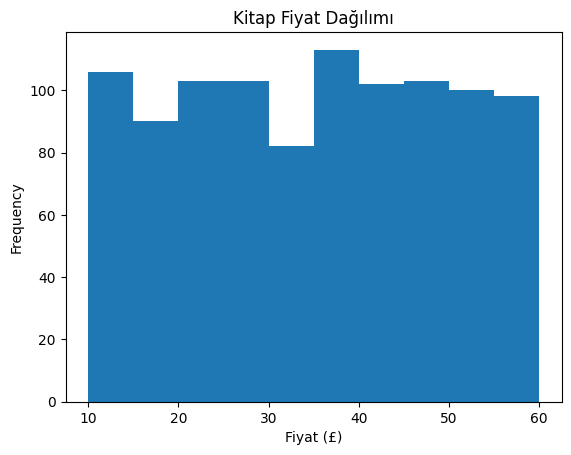

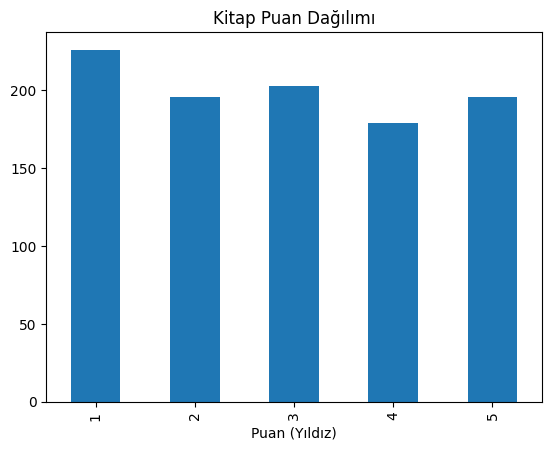

In [14]:
# Fiyat dağılımı
df['Price'].plot(kind='hist', title='Kitap Fiyat Dağılımı')
plt.xlabel('Fiyat (£)')
plt.show()

# Puana göre dağılım
df['Rating'].value_counts().sort_index().plot(kind='bar', title='Kitap Puan Dağılımı')
plt.xlabel('Puan (Yıldız)')
plt.show()

In [18]:
from nbresult import ChallengeResult
books_df = pd.DataFrame(all_books_data)
result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/ataka/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/ataka/data-book-scraping/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin master

